In [142]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [143]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [144]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [145]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [146]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

/var/folders/64/v3w6ln215tzd14scrycwkjl40000gn/T/ipykernel_43220/1895431338.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect=True)


In [147]:
# View all of the classes that automap found
print(base.classes.keys())

['measurement', 'station']


In [148]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [149]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [150]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
print(f'Most recent date: {most_recent_date}')

Most recent date: 2017-08-23


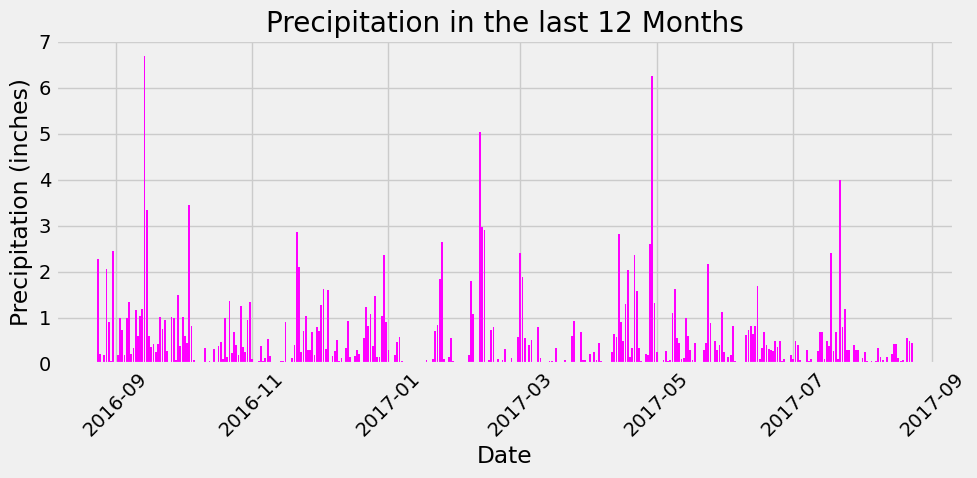

In [151]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'])
precipitation_df = precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,5))
plt.bar(precipitation_df['date'], precipitation_df['precipitation'], color='magenta')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in the last 12 Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [152]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df['precipitation'].describe()
print(summary_stats)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [153]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(station).count()
print(f'Total number of Stations: {total_stations}')

Total number of Stations: 9


In [154]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print("Most active stations and their counts:")
for station in active_stations:
    print(station)

Most active stations and their counts:
('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [155]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = active_stations[0][0]
print(f'Most active station ID: {most_active_station_id}')

Most active station ID: USC00519281


Lowest Temperature: {lowest_temp}
Highest Temperature: {highest_temp}
Average Temperature: {average_temp}


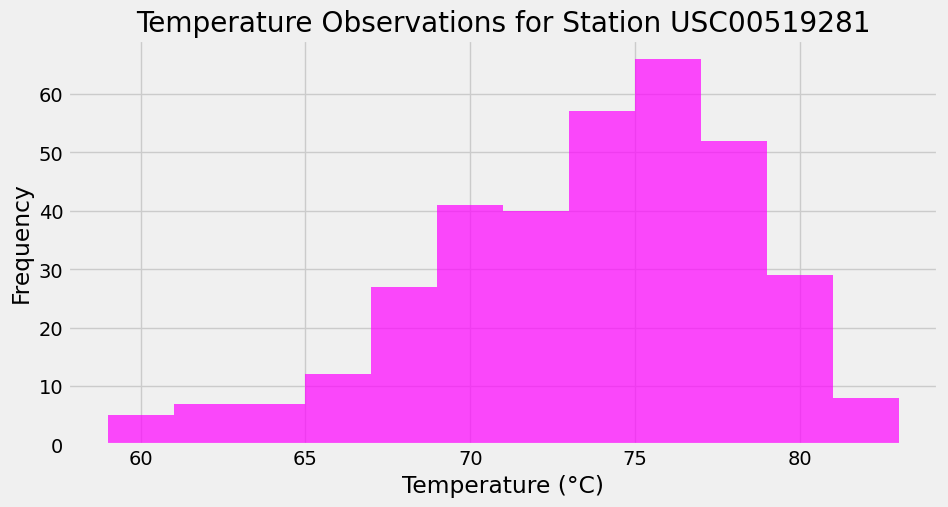

In [156]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(measurement.tobs).\
filter(measurement.station == most_active_station_id).\
filter(measurement.date >= last_year).all()

temperature_df = pd.DataFrame(temperature_data, columns=['temperature'])

lowest_temp = temperature_df['temperature'].min()
highest_temp = temperature_df['temperature'].max()
average_temp = temperature_df['temperature'].mean()

print('Lowest Temperature: {lowest_temp}')
print('Highest Temperature: {highest_temp}')
print('Average Temperature: {average_temp}')

plt.figure(figsize=(10,5))
plt.hist(temperature_df['temperature'], bins=12, color='magenta', alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station_id}')
plt.grid(True)
plt.show()

# Close Session

In [157]:
# Close Session
session.close()